**Import all the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn



%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**load the dataset**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving H2HBABBA2986.csv to H2HBABBA2986.csv


**Read the csv file**

In [3]:
df = pd.read_csv('H2HBABBA2986.csv')

**show the dataset**

In [4]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,NaN,2020.0,1.930700e+09,2020-03-25,20200325,20200325,20200409.0,USD,RV,1.0,NaN,19508.61,20200325.0,NAU5,1.930700e+09,1
1,CA02,0140105847,GORDON F associates,2019-06-24 00:00:00,2019.0,2.960552e+09,2019-06-08,20190608,20190608,20190618.0,CAD,RV,1.0,NaN,75259.66,20190608.0,CA10,2.960552e+09,0
2,U001,0200769623,WAL-MAR co,2019-08-06 00:00:00,2019.0,1.929659e+09,2019-07-26,20190725,20190726,20190810.0,USD,RV,1.0,NaN,50906.31,20190726.0,NAH4,1.929659e+09,0
3,U001,0200508557,FOODL co,2019-06-10 00:00:00,2019.0,1.929337e+09,2019-05-24,20190517,20190524,20190608.0,USD,RV,1.0,NaN,2273.37,20190524.0,NAA8,1.929337e+09,0
4,U001,0200769623,WAL-MAR associates,2019-02-04 00:00:00,2019.0,1.928652e+09,2019-01-23,20190121,20190123,20190207.0,USD,RV,1.0,NaN,2999.92,20190123.0,NAH4,1.928652e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200875006,KROGER co,2019-05-03 00:00:00,2019.0,1.929176e+09,2019-04-18,20190419,20190418,20190503.0,USD,RV,1.0,NaN,104935.25,20190418.0,NAA8,1.929176e+09,0
49996,U001,0200416837,DEC llc,NaN,2020.0,1.930813e+09,2020-04-22,20200422,20200422,20200509.0,USD,RV,1.0,NaN,462.24,20200416.0,NAM4,1.930813e+09,1
49997,U001,0200769623,WAL-MAR llc,2019-04-22 00:00:00,2019.0,1.929116e+09,2019-04-11,20190410,20190411,20190426.0,USD,RV,1.0,NaN,51229.90,20190411.0,NAH4,1.929116e+09,0
49998,U001,0200750051,ALBER corporation,2019-03-22 00:00:00,2019.0,1.928924e+09,2019-03-07,20190307,20190307,20190322.0,USD,RV,1.0,NaN,109197.74,20190307.0,NAA8,1.928924e+09,0


**df. isna(). sum() returns the number of missing values in each column.**

In [5]:
df.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    8
isOpen                        0
dtype: int64

**This dataset contains 50000 rows and 19 columns**

In [6]:
df.shape


(50000, 19)

In [7]:
unique_cols = [x for x in df.columns if df[x].nunique()==1]
print(unique_cols)
df.drop(unique_cols,axis=1,inplace=True)
df.columns

['posting_id']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

**We can use the mean method after isnull to visualise the percentage of missing values for each variable**

In [8]:
df.isnull().mean()

business_code             0.00000
cust_number               0.00000
name_customer             0.00000
clear_date                0.20000
buisness_year             0.00000
doc_id                    0.00000
posting_date              0.00000
document_create_date      0.00000
document_create_date.1    0.00000
due_in_date               0.00000
invoice_currency          0.00000
document type             0.00000
area_business             1.00000
total_open_amount         0.00000
baseline_create_date      0.00000
cust_payment_terms        0.00000
invoice_id                0.00016
isOpen                    0.00000
dtype: float64

**check the presence of null data**

In [9]:
[col for col in df.columns if df[col].isnull().sum() > 0]

['clear_date', 'area_business', 'invoice_id']

**converts the dates column into dd-mm-yy format**

In [10]:
df['due_in_date']=pd.to_datetime(df.due_in_date, format='%Y%m%d')

In [11]:
df['baseline_create_date']=df['baseline_create_date'].astype(int)
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'].astype(str),format='%Y-%m-%d')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,NaN,2020.0,1.930700e+09,2020-03-25,20200325,20200325,2020-04-09,USD,RV,NaN,19508.61,2020-03-25,NAU5,1.930700e+09,1
1,CA02,0140105847,GORDON F associates,2019-06-24 00:00:00,2019.0,2.960552e+09,2019-06-08,20190608,20190608,2019-06-18,CAD,RV,NaN,75259.66,2019-06-08,CA10,2.960552e+09,0
2,U001,0200769623,WAL-MAR co,2019-08-06 00:00:00,2019.0,1.929659e+09,2019-07-26,20190725,20190726,2019-08-10,USD,RV,NaN,50906.31,2019-07-26,NAH4,1.929659e+09,0
3,U001,0200508557,FOODL co,2019-06-10 00:00:00,2019.0,1.929337e+09,2019-05-24,20190517,20190524,2019-06-08,USD,RV,NaN,2273.37,2019-05-24,NAA8,1.929337e+09,0
4,U001,0200769623,WAL-MAR associates,2019-02-04 00:00:00,2019.0,1.928652e+09,2019-01-23,20190121,20190123,2019-02-07,USD,RV,NaN,2999.92,2019-01-23,NAH4,1.928652e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200875006,KROGER co,2019-05-03 00:00:00,2019.0,1.929176e+09,2019-04-18,20190419,20190418,2019-05-03,USD,RV,NaN,104935.25,2019-04-18,NAA8,1.929176e+09,0
49996,U001,0200416837,DEC llc,NaN,2020.0,1.930813e+09,2020-04-22,20200422,20200422,2020-05-09,USD,RV,NaN,462.24,2020-04-16,NAM4,1.930813e+09,1
49997,U001,0200769623,WAL-MAR llc,2019-04-22 00:00:00,2019.0,1.929116e+09,2019-04-11,20190410,20190411,2019-04-26,USD,RV,NaN,51229.90,2019-04-11,NAH4,1.929116e+09,0
49998,U001,0200750051,ALBER corporation,2019-03-22 00:00:00,2019.0,1.928924e+09,2019-03-07,20190307,20190307,2019-03-22,USD,RV,NaN,109197.74,2019-03-07,NAA8,1.928924e+09,0


In [12]:
df['document_create_date']=df['document_create_date'].astype(int)
df['document_create_date']=pd.to_datetime(df['document_create_date'].astype(str),format='%Y-%m-%d')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,NaN,2020.0,1.930700e+09,2020-03-25,2020-03-25,20200325,2020-04-09,USD,RV,NaN,19508.61,2020-03-25,NAU5,1.930700e+09,1
1,CA02,0140105847,GORDON F associates,2019-06-24 00:00:00,2019.0,2.960552e+09,2019-06-08,2019-06-08,20190608,2019-06-18,CAD,RV,NaN,75259.66,2019-06-08,CA10,2.960552e+09,0
2,U001,0200769623,WAL-MAR co,2019-08-06 00:00:00,2019.0,1.929659e+09,2019-07-26,2019-07-25,20190726,2019-08-10,USD,RV,NaN,50906.31,2019-07-26,NAH4,1.929659e+09,0
3,U001,0200508557,FOODL co,2019-06-10 00:00:00,2019.0,1.929337e+09,2019-05-24,2019-05-17,20190524,2019-06-08,USD,RV,NaN,2273.37,2019-05-24,NAA8,1.929337e+09,0
4,U001,0200769623,WAL-MAR associates,2019-02-04 00:00:00,2019.0,1.928652e+09,2019-01-23,2019-01-21,20190123,2019-02-07,USD,RV,NaN,2999.92,2019-01-23,NAH4,1.928652e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200875006,KROGER co,2019-05-03 00:00:00,2019.0,1.929176e+09,2019-04-18,2019-04-19,20190418,2019-05-03,USD,RV,NaN,104935.25,2019-04-18,NAA8,1.929176e+09,0
49996,U001,0200416837,DEC llc,NaN,2020.0,1.930813e+09,2020-04-22,2020-04-22,20200422,2020-05-09,USD,RV,NaN,462.24,2020-04-16,NAM4,1.930813e+09,1
49997,U001,0200769623,WAL-MAR llc,2019-04-22 00:00:00,2019.0,1.929116e+09,2019-04-11,2019-04-10,20190411,2019-04-26,USD,RV,NaN,51229.90,2019-04-11,NAH4,1.929116e+09,0
49998,U001,0200750051,ALBER corporation,2019-03-22 00:00:00,2019.0,1.928924e+09,2019-03-07,2019-03-07,20190307,2019-03-22,USD,RV,NaN,109197.74,2019-03-07,NAA8,1.928924e+09,0


In [13]:
df['document_create_date.1']=df['document_create_date.1'].astype(int)
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'].astype(str),format='%Y-%m-%d')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,NaN,2020.0,1.930700e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,USD,RV,NaN,19508.61,2020-03-25,NAU5,1.930700e+09,1
1,CA02,0140105847,GORDON F associates,2019-06-24 00:00:00,2019.0,2.960552e+09,2019-06-08,2019-06-08,2019-06-08,2019-06-18,CAD,RV,NaN,75259.66,2019-06-08,CA10,2.960552e+09,0
2,U001,0200769623,WAL-MAR co,2019-08-06 00:00:00,2019.0,1.929659e+09,2019-07-26,2019-07-25,2019-07-26,2019-08-10,USD,RV,NaN,50906.31,2019-07-26,NAH4,1.929659e+09,0
3,U001,0200508557,FOODL co,2019-06-10 00:00:00,2019.0,1.929337e+09,2019-05-24,2019-05-17,2019-05-24,2019-06-08,USD,RV,NaN,2273.37,2019-05-24,NAA8,1.929337e+09,0
4,U001,0200769623,WAL-MAR associates,2019-02-04 00:00:00,2019.0,1.928652e+09,2019-01-23,2019-01-21,2019-01-23,2019-02-07,USD,RV,NaN,2999.92,2019-01-23,NAH4,1.928652e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200875006,KROGER co,2019-05-03 00:00:00,2019.0,1.929176e+09,2019-04-18,2019-04-19,2019-04-18,2019-05-03,USD,RV,NaN,104935.25,2019-04-18,NAA8,1.929176e+09,0
49996,U001,0200416837,DEC llc,NaN,2020.0,1.930813e+09,2020-04-22,2020-04-22,2020-04-22,2020-05-09,USD,RV,NaN,462.24,2020-04-16,NAM4,1.930813e+09,1
49997,U001,0200769623,WAL-MAR llc,2019-04-22 00:00:00,2019.0,1.929116e+09,2019-04-11,2019-04-10,2019-04-11,2019-04-26,USD,RV,NaN,51229.90,2019-04-11,NAH4,1.929116e+09,0
49998,U001,0200750051,ALBER corporation,2019-03-22 00:00:00,2019.0,1.928924e+09,2019-03-07,2019-03-07,2019-03-07,2019-03-22,USD,RV,NaN,109197.74,2019-03-07,NAA8,1.928924e+09,0


**converts the date column into datetime format**

In [14]:
df['clear_date']=pd.to_datetime(df['clear_date'])
df['posting_date']=pd.to_datetime(df['posting_date'])
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'])
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'])
df['due_in_date']=pd.to_datetime(df['due_in_date'])
df.dtypes


business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

**calculate the delay by subtracting due_in_date column from clear_date column**

In [15]:
df['Delay'] = (df['clear_date'] - df['due_in_date']).dt.days

**show the delay**

In [16]:
df['Delay']

0        NaN
1        6.0
2       -4.0
3        2.0
4       -3.0
        ... 
49995    0.0
49996    NaN
49997   -4.0
49998    0.0
49999   -5.0
Name: Delay, Length: 50000, dtype: float64

**plot the graph for the delay**

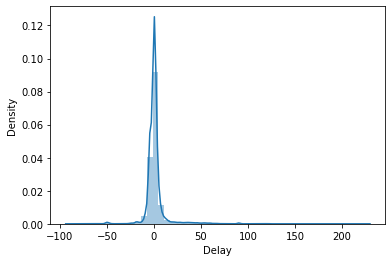

In [17]:
sns.distplot(df['Delay'])

**use correlation to find the relationship between the variables**

In [18]:
df.corr().loc['Delay',:]


buisness_year       -0.004999
doc_id               0.154041
area_business             NaN
total_open_amount    0.003190
invoice_id           0.136574
isOpen                    NaN
Delay                1.000000
Name: Delay, dtype: float64

**convert all the dates column from the datetime format to days**

In [19]:
df['posting_date']=(df['posting_date']-pd.to_datetime('1970-01-01')).dt.days


In [20]:
df['document_create_date']=(df['document_create_date']-pd.to_datetime('1970-01-01')).dt.days


In [21]:
df['document_create_date.1']=(df['document_create_date.1']-pd.to_datetime('1970-01-01')).dt.days


In [22]:
df['clear_date']=(df['clear_date']-pd.to_datetime('1970-01-01')).dt.days


In [23]:
df['due_in_date']=(df['due_in_date']-pd.to_datetime('1970-01-01')).dt.days


In [24]:
df['baseline_create_date']=(df['baseline_create_date']-pd.to_datetime('1970-01-01')).dt.days


**use label encoder to convert all the string column such as business_code, name_customer etc. to numeric value**

In [25]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['business_code']=label_encoder.fit_transform(df['business_code'])
df['business_code']


0        1
1        0
2        1
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: business_code, Length: 50000, dtype: int64

In [26]:

df['name_customer']=label_encoder.fit_transform(df['name_customer'])
df['name_customer']


0         253
1        1535
2        4069
3        1351
4        4068
         ... 
49995    2170
49996     980
49997    4074
49998      89
49999     989
Name: name_customer, Length: 50000, dtype: int64

In [27]:

df['invoice_currency']=label_encoder.fit_transform(df['invoice_currency'])
df['invoice_currency']


0        1
1        0
2        1
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: invoice_currency, Length: 50000, dtype: int64

In [28]:

df['document type']=label_encoder.fit_transform(df['document type'])
df['document type']




0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: document type, Length: 50000, dtype: int64

In [29]:

df['cust_payment_terms']=label_encoder.fit_transform(df['cust_payment_terms'])
df['cust_payment_terms']



0        50
1         5
2        36
3        20
4        36
         ..
49995    20
49996    40
49997    36
49998    20
49999    40
Name: cust_payment_terms, Length: 50000, dtype: int64

In [30]:

df['cust_number']=label_encoder.fit_transform(df['cust_number'])
df['cust_number']




0        1316
1         415
2         878
3         637
4         878
         ... 
49995     992
49996     602
49997     878
49998     837
49999     567
Name: cust_number, Length: 50000, dtype: int64

In [31]:

df['buisness_year']=label_encoder.fit_transform(df['buisness_year'])
df['buisness_year']




0        1
1        0
2        0
3        0
4        0
        ..
49995    0
49996    1
49997    0
49998    0
49999    1
Name: buisness_year, Length: 50000, dtype: int64

**now all the required columns changes into numeric value**

In [32]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,1,1316,253,NaN,1,1.930700e+09,18346,18346,18346,18361,1,0,NaN,19508.61,18346,50,1.930700e+09,1,NaN
1,0,415,1535,18071.0,0,2.960552e+09,18055,18055,18055,18065,0,0,NaN,75259.66,18055,5,2.960552e+09,0,6.0
2,1,878,4069,18114.0,0,1.929659e+09,18103,18102,18103,18118,1,0,NaN,50906.31,18103,36,1.929659e+09,0,-4.0
3,1,637,1351,18057.0,0,1.929337e+09,18040,18033,18040,18055,1,0,NaN,2273.37,18040,20,1.929337e+09,0,2.0
4,1,878,4068,17931.0,0,1.928652e+09,17919,17917,17919,17934,1,0,NaN,2999.92,17919,36,1.928652e+09,0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,992,2170,18019.0,0,1.929176e+09,18004,18005,18004,18019,1,0,NaN,104935.25,18004,20,1.929176e+09,0,0.0
49996,1,602,980,NaN,1,1.930813e+09,18374,18374,18374,18391,1,0,NaN,462.24,18368,40,1.930813e+09,1,NaN
49997,1,878,4074,18008.0,0,1.929116e+09,17997,17996,17997,18012,1,0,NaN,51229.90,17997,36,1.929116e+09,0,-4.0
49998,1,837,89,17977.0,0,1.928924e+09,17962,17962,17962,17977,1,0,NaN,109197.74,17962,20,1.928924e+09,0,0.0


**nunique() function return Series with number of distinct observations.**

In [33]:
df.nunique()

business_code                 6
cust_number                1415
name_customer              4206
clear_date                  399
buisness_year                 2
doc_id                    48843
posting_date                503
document_create_date        506
document_create_date.1      503
due_in_date                 548
invoice_currency              2
document type                 2
area_business                 0
total_open_amount         44167
baseline_create_date        503
cust_payment_terms           71
invoice_id                48836
isOpen                        2
Delay                       175
dtype: int64

**drop the area_business and invoice_id column**

In [34]:
df.drop(['area_business','invoice_id'],axis=1,inplace=True)

**Remove the datapoints when the target value is null**

In [35]:
main_train = df[df.clear_date.isnull()==False]

main_test = df[df.clear_date.isnull()]

In [36]:
#Preprocess the data 
main_train.shape

(40000, 17)

In [37]:
main_train.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
isOpen                    0
Delay                     0
dtype: int64

In [38]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 1 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           40000 non-null  int64  
 1   cust_number             40000 non-null  int64  
 2   name_customer           40000 non-null  int64  
 3   clear_date              40000 non-null  float64
 4   buisness_year           40000 non-null  int64  
 5   doc_id                  40000 non-null  float64
 6   posting_date            40000 non-null  int64  
 7   document_create_date    40000 non-null  int64  
 8   document_create_date.1  40000 non-null  int64  
 9   due_in_date             40000 non-null  int64  
 10  invoice_currency        40000 non-null  int64  
 11  document type           40000 non-null  int64  
 12  total_open_amount       40000 non-null  float64
 13  baseline_create_date    40000 non-null  int64  
 14  cust_payment_terms      40000 non-null

In [39]:
main_train.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
isOpen                    0
Delay                     0
dtype: int64

In [40]:
for col in main_train.columns:
    if main_train[col].nunique()<= 12:
        print(main_train[col].value_counts())
        print('#########################')

1    36218
0     3155
5      501
2      117
3        8
4        1
Name: business_code, dtype: int64
#########################
0    34706
1     5294
Name: buisness_year, dtype: int64
#########################
1    36845
0     3155
Name: invoice_currency, dtype: int64
#########################
0    39992
1        8
Name: document type, dtype: int64
#########################
0    40000
Name: isOpen, dtype: int64
#########################


**Split data**

In [41]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e clear_date
X = main_train.drop('clear_date',axis=1)

# y --> contains only the target value 
y = main_train['clear_date']

In [42]:
#splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [43]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [44]:
X_train.shape , X_val.shape , X_test.shape

((28000, 16), (6000, 16), (6000, 16))

In [45]:
X

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,Delay
1,0,415,1535,0,2.960552e+09,18055,18055,18055,18065,0,0,75259.66,18055,5,0,6.0
2,1,878,4069,0,1.929659e+09,18103,18102,18103,18118,1,0,50906.31,18103,36,0,-4.0
3,1,637,1351,0,1.929337e+09,18040,18033,18040,18055,1,0,2273.37,18040,20,0,2.0
4,1,878,4068,0,1.928652e+09,17919,17917,17919,17934,1,0,2999.92,17919,36,0,-3.0
6,1,901,1325,0,1.929831e+09,18145,18144,18145,18160,1,0,23708.88,18145,20,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,1,1015,3618,1,1.930333e+09,18260,18260,18260,18275,1,0,763.91,18260,20,0,0.0
49995,1,992,2170,0,1.929176e+09,18004,18005,18004,18019,1,0,104935.25,18004,20,0,0.0
49997,1,878,4074,0,1.929116e+09,17997,17996,17997,18012,1,0,51229.90,17997,36,0,-4.0
49998,1,837,89,0,1.928924e+09,17962,17962,17962,17977,1,0,109197.74,17962,20,0,0.0


In [46]:
y

1        18071.0
2        18114.0
3        18057.0
4        17931.0
6        18162.0
          ...   
49994    18275.0
49995    18019.0
49997    18008.0
49998    17977.0
49999    18295.0
Name: clear_date, Length: 40000, dtype: float64

**EDA**

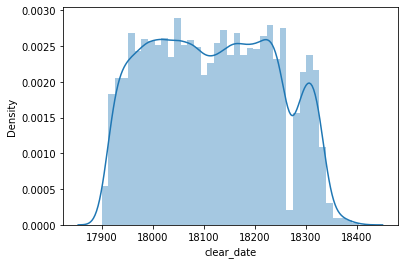

In [47]:
# distribution of the target column 
# right skewed distribution
# outliers present but not that significant , hence  
sns.distplot(y_train)

In [48]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,Delay,clear_date
0,1,0,415,1535,0,2.960552e+09,18055,18055,18055,18065,0,0,75259.66,18055,5,0,6.0,18071.0
1,2,1,878,4069,0,1.929659e+09,18103,18102,18103,18118,1,0,50906.31,18103,36,0,-4.0,18114.0
2,3,1,637,1351,0,1.929337e+09,18040,18033,18040,18055,1,0,2273.37,18040,20,0,2.0,18057.0
3,4,1,878,4068,0,1.928652e+09,17919,17917,17919,17934,1,0,2999.92,17919,36,0,-3.0,17931.0
4,6,1,901,1325,0,1.929831e+09,18145,18144,18145,18160,1,0,23708.88,18145,20,0,2.0,18162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,34952,1,11,1107,0,1.929620e+09,18092,18092,18092,18107,1,0,65958.99,18092,20,0,1.0,18108.0
27996,34953,1,568,3950,0,1.930185e+09,18222,18222,18222,18237,1,0,29241.04,18222,20,0,2.0,18239.0
27997,34956,1,878,4077,0,1.929990e+09,18177,18178,18177,18192,1,0,1414.69,18177,36,0,16.0,18208.0
27998,34957,1,891,2164,0,1.929828e+09,18142,18143,18142,18157,1,0,15395.25,18142,20,0,0.0,18157.0


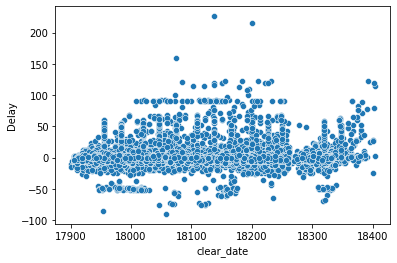

In [49]:

sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="clear_date", y="Delay")

In [50]:
X_train.Delay.nunique()

167

**Feature selection**

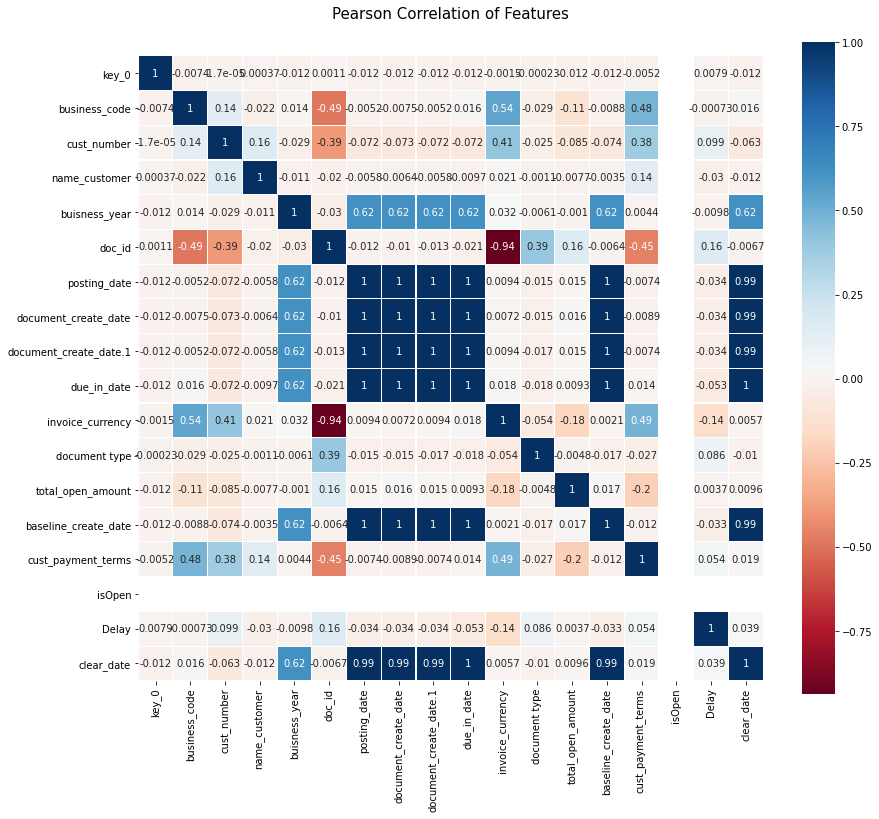

In [51]:
import  matplotlib.pyplot as plt
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 1 to 34958
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           28000 non-null  int64  
 1   cust_number             28000 non-null  int64  
 2   name_customer           28000 non-null  int64  
 3   buisness_year           28000 non-null  int64  
 4   doc_id                  28000 non-null  float64
 5   posting_date            28000 non-null  int64  
 6   document_create_date    28000 non-null  int64  
 7   document_create_date.1  28000 non-null  int64  
 8   due_in_date             28000 non-null  int64  
 9   invoice_currency        28000 non-null  int64  
 10  document type           28000 non-null  int64  
 11  total_open_amount       28000 non-null  float64
 12  baseline_create_date    28000 non-null  int64  
 13  cust_payment_terms      28000 non-null  int64  
 14  isOpen                  28000 non-null

In [53]:
# also since all the columns have been converted to int/ float , we can use variance threshold -- ;-D

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [54]:
sel.variances_

array([2.73865388e-01, 6.85142274e+04, 1.96170283e+06, 1.13891709e-01,
       9.01720944e+16, 1.42278082e+04, 1.42314074e+04, 1.42286519e+04,
       1.42616862e+04, 7.19461416e-02, 2.49937500e-04, 1.58643576e+09,
       1.42351187e+04, 1.63888087e+02, 0.00000000e+00, 1.19972501e+02])

**Modelling**
**Create a base model **

In [55]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_predict = base_model.predict(X_val)

In [57]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict)

0.0

**Tree based Model**

In [58]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [59]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [60]:
y_predict2 = regressor.predict(X_val)

In [61]:
mean_squared_error(y_val, y_predict2, squared=False)

10.576179387435928

In [62]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

10.215061456362728

In [63]:
# see again clear_date is all nan
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,Delay
0,1,1316,253,NaN,1,1.930700e+09,18346,18346,18346,18361,1,0,19508.61,18346,50,1,NaN
5,1,903,2526,NaN,1,1.930724e+09,18352,18352,18352,18367,1,0,102208.85,18352,20,1,NaN
25,1,773,450,NaN,1,1.930754e+09,18358,18358,18358,18373,1,0,456.55,18358,20,1,NaN
26,1,903,2532,NaN,1,1.930646e+09,18334,18333,18334,18349,1,0,127540.92,18334,20,1,NaN
28,1,735,3039,NaN,1,1.930623e+09,18329,18329,18329,18344,1,0,101312.86,18329,20,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49963,1,878,4067,NaN,1,1.930871e+09,18390,18388,18390,18405,1,0,47568.73,18390,36,1,NaN
49979,1,726,1383,NaN,1,1.930692e+09,18345,18345,18345,18360,1,0,34757.57,18345,20,1,NaN
49981,1,855,3261,NaN,1,1.930651e+09,18336,18334,18336,18351,1,0,14307.82,18336,36,1,NaN
49986,1,1031,3164,NaN,1,1.930708e+09,18348,18347,18348,18363,1,0,600.08,18348,20,1,NaN


In [64]:
main_test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
isOpen                        0
Delay                     10000
dtype: int64

In [65]:
X_main_test = main_test.drop(['Delay'],axis=1)
X_main_test

# ALSO LETS DROP DELAY FROM MAIN TEST ITSELF
main_test.drop(['Delay'], inplace =True,axis=1)


In [66]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 49996
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           10000 non-null  int64  
 1   cust_number             10000 non-null  int64  
 2   name_customer           10000 non-null  int64  
 3   clear_date              0 non-null      float64
 4   buisness_year           10000 non-null  int64  
 5   doc_id                  10000 non-null  float64
 6   posting_date            10000 non-null  int64  
 7   document_create_date    10000 non-null  int64  
 8   document_create_date.1  10000 non-null  int64  
 9   due_in_date             10000 non-null  int64  
 10  invoice_currency        10000 non-null  int64  
 11  document type           10000 non-null  int64  
 12  total_open_amount       10000 non-null  float64
 13  baseline_create_date    10000 non-null  int64  
 14  cust_payment_terms      10000 non-null

In [67]:
X_main_test.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'isOpen'],
      dtype='object')

In [68]:
X_train.columns

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'isOpen', 'Delay'],
      dtype='object')

In [69]:
X_main_test.fillna(df.mean(), inplace=True)

In [70]:
final_result = regressor.predict(X_main_test)

In [71]:
final_result = pd.Series(final_result,name='Delay')

In [72]:
# resetting the index of main test so that we can merge Delay series with it
main_test.reset_index(drop='clear_date',inplace=True)

In [73]:
Final = main_test.merge(final_result , on = X_main_test.index )
Final.drop(['clear_date','posting_date','document_create_date','document_create_date.1'],axis=1,inplace=True)
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,Delay
0,0,1,1316,253,1,1.930700e+09,18361,1,0,19508.61,18346,50,1,18349.970297
1,5,1,903,2526,1,1.930724e+09,18367,1,0,102208.85,18352,20,1,18349.970297
2,25,1,773,450,1,1.930754e+09,18373,1,0,456.55,18358,20,1,18248.203150
3,26,1,903,2532,1,1.930646e+09,18349,1,0,127540.92,18334,20,1,18349.970297
4,28,1,735,3039,1,1.930623e+09,18344,1,0,101312.86,18329,20,1,18322.117014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49963,1,878,4067,1,1.930871e+09,18405,1,0,47568.73,18390,36,1,18349.970297
9996,49979,1,726,1383,1,1.930692e+09,18360,1,0,34757.57,18345,20,1,18349.970297
9997,49981,1,855,3261,1,1.930651e+09,18351,1,0,14307.82,18336,36,1,18248.203150
9998,49986,1,1031,3164,1,1.930708e+09,18363,1,0,600.08,18348,20,1,18248.203150


In [74]:
Final['Predicted_Payment_days']=Final['due_in_date']+Final['Delay']

In [75]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,Delay,Predicted_Payment_days
0,0,1,1316,253,1,1.930700e+09,18361,1,0,19508.61,18346,50,1,18349.970297,36710.970297
1,5,1,903,2526,1,1.930724e+09,18367,1,0,102208.85,18352,20,1,18349.970297,36716.970297
2,25,1,773,450,1,1.930754e+09,18373,1,0,456.55,18358,20,1,18248.203150,36621.203150
3,26,1,903,2532,1,1.930646e+09,18349,1,0,127540.92,18334,20,1,18349.970297,36698.970297
4,28,1,735,3039,1,1.930623e+09,18344,1,0,101312.86,18329,20,1,18322.117014,36666.117014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49963,1,878,4067,1,1.930871e+09,18405,1,0,47568.73,18390,36,1,18349.970297,36754.970297
9996,49979,1,726,1383,1,1.930692e+09,18360,1,0,34757.57,18345,20,1,18349.970297,36709.970297
9997,49981,1,855,3261,1,1.930651e+09,18351,1,0,14307.82,18336,36,1,18248.203150,36599.203150
9998,49986,1,1031,3164,1,1.930708e+09,18363,1,0,600.08,18348,20,1,18248.203150,36611.203150
